# Peak width vs mass

In [8]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb 09/echowidth_glycerin_sample_size/2_743")

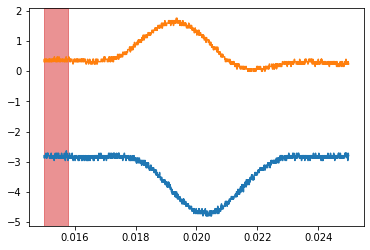

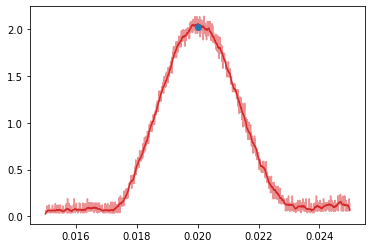

In [29]:
FIDData = pd.read_csv(rel_path / "0_29.csv", header = None)

chan1 = FIDData[1].values
chan2 = FIDData[2].values
tlist = FIDData[0].values

plt.plot(tlist, chan1)
plt.plot(tlist, chan2)

avg_window = slice(0,200)

plt.axvspan(min(tlist[avg_window]), max(tlist[avg_window]), color = "tab:red", alpha = .5)

plt.show()

chan1 = np.subtract(chan1, np.mean(chan1[avg_window]))
chan2 = np.subtract(chan2, np.mean(chan2[avg_window]))

trans_mag = np.sqrt(np.square(chan1) + np.square(chan2))

trans_mag_smooth = np.convolve(trans_mag, np.ones(30)/30, mode="same") 

peaks,data = sc.signal.find_peaks(
    trans_mag_smooth,
    prominence = 1
)

stdev = max(trans_mag[avg_window])  - min(trans_mag[avg_window])

plt.plot(tlist,trans_mag_smooth, color = "tab:red")
plt.plot(tlist,trans_mag, color = "tab:red", alpha = .5)
plt.plot([tlist[peak] for peak in peaks], [trans_mag[peak] for peak in peaks], linestyle = "None", marker = "o")
plt.show()

In [27]:
widths = sc.signal.peak_widths(trans_mag_smooth, peaks)

In [30]:
widths

(array([739.80132694]),
 array([1.0609547]),
 array([893.77343744]),
 array([1633.57476439]))